#                          기계학습 기말 프로젝트
###                                                                                                                   2013210069 배승학


이 프로젝트는 원하는 데이터를 이용하여 classfication 혹은 regression model을 설계하는 것이다.

## 데이터 선택.

데이터는 http://archive.ics.uci.edu/ml/datasets/Census+Income 에서 가지고 온 Census Income Data Set이다. Census data에 기반으로 연봉이  50K dollor (56백만원) 을 넘을 지 넘지 않을 지를 보여주는 데이터이다. Census는 1994년 기준이고 Age > 16세, capital-gain > 100, FNLWGT(Final Weight) > 1, HRSWK (Hours-per-week) > 0의 조건을 충족하는 데이터이다. 

Number of Instances : 48842
Attribute Characteristics : Categorical, Integer
Number of attributes : 14
Missing Values : Yes

Attribute Information : 

age(나이) : continuous
workclass (노동계급)  : Private(일반 사기업), Self-emp-not-inc (자영업이 아닌 법인), Self-emp-inc (자영업자 통합), Federal-gov (연방정부 소속), Local-gov (지방정부 소속), State-gov (주정부 소속), Without-pay (무급), Never-worked (일 경험 없음).  
fnlwgt (final weight / 최종 몸무게): continuous. 
education(교육) : Bachelors (학사), Some-college (대학 자퇴), 11th (고 2 자퇴), HS-grad (고졸), Prof-school(전문 대학교), Assoc-acdm (2년제 대학 졸), Assoc-voc (직업 전문 대학), 9th (중 3 자퇴), 7th-8th (중학교 자퇴), 12th(고3 자퇴), Masters (석사), 1st-4th (초 자퇴), 10th (고 1 자퇴), Doctorate (박사 ), 5th-6th (초 5-6 자퇴), Preschool (유치원). 
education-num(총 교육 받은 기간) : continuous. 
marital-status(결혼 상태) : Married-civ-spouse (결혼), Divorced (이혼), Never-married (미혼), Separated (별거), Widowed (미망인), Married-spouse-absent (결혼 상대 부재), Married-AF-spouse (married- armed forces spouse, 군인과 결혼). 
occupation (직업): Tech-support (기술직), Craft-repair (기능직), Other-service (다른 서비스직), Sales (세일즈), Exec-managerial (관리직), Prof-specialty (전문직), Handlers-cleaners (청소직), Machine-op-inspct (기계 관리직), Adm-clerical (사무직), Farming-fishing (임야업), Transport-moving (수송업), Priv-house-serv (가사도우미), Protective-serv (보안), Armed-Forces(군인). 
relationship(관계): Wife (부인), Own-child(자식), Husband(남편), Not-in-family (가족 소속 안되어 있음), Other-relative (사촌), Unmarried(미혼). 
race(인종): White(백인), Asian-Pac-Islander(동양인 및 태평양 출신), Amer-Indian-Eskimo(인디안 혹은 에스키모), Other (그 외), Black(흑인). 
sex(성별): Female(여자), Male(남자). 
capital-gain(주 소득 외 수익): continuous. 
capital-loss(주 소득 외 손실): continuous. 
hours-per-week(주 일하는 시간): continuous. 
native-country(출신 국가): United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

데이터의 attribute를 보면 age, fnlwgt(final weight), education-num, capital-gain, capital-loss, hours-per-week는 continuous, 혹은 numerical한 데이터이고 나머지는 다 categorical이다. Missing values는 존재하고 instance의 개수는 총 48842개이다. 

아래에선 좀 더 데이터에 대해서 알아보도록 하겠다. 

In [2]:
import pandas as pd

In [3]:
adult_path = 'C:/Users/ASUS/Desktop/adult.data.csv'

In [4]:
adult = pd.read_csv(adult_path)

In [5]:
adult

age          workclass  fnlwgt      education  education-num  \
0       39          State-gov   77516      Bachelors             13   
1       50   Self-emp-not-inc   83311      Bachelors             13   
2       38            Private  215646        HS-grad              9   
3       53            Private  234721           11th              7   
4       28            Private  338409      Bachelors             13   
5       37            Private  284582        Masters             14   
6       49            Private  160187            9th              5   
7       52   Self-emp-not-inc  209642        HS-grad              9   
8       31            Private   45781        Masters             14   
9       42            Private  159449      Bachelors             13   
10      37            Private  280464   Some-college             10   
11      30          State-gov  141297      Bachelors             13   
12      23            Private  122272      Bachelors             13   
13      32            Private  205019     Assoc-acdm             12   
14      40            Private  121772      Assoc-voc             11   
15      34            Private  245487        7th-8th              4   
16      25   Self-emp-not-inc  176756        HS-grad              9   
17      32            Private  186824        HS-grad              9   
18      38            Private   28887           11th              7   
19      43   Self-emp-not-inc  292175        Masters             14   
20      40            Private  193524      Doctorate             16   
21      54            Private  302146        HS-grad              9   
22      35        Federal-gov   76845            9th              5   
23      43            Private  117037           11th              7   
24      59            Private  109015        HS-grad              9   
25      56          Local-gov  216851      Bachelors             13   
26      19            Private  168294        HS-grad              9   
27      54                  ?  180211   Some-college             10   
28      39            Private  367260        HS-grad              9   
29      49            Private  193366        HS-grad              9   
...    ...                ...     ...            ...            ...   
32531   30                  ?   33811      Bachelors             13   
32532   34            Private  204461      Doctorate             16   
32533   54            Private  337992      Bachelors             13   
32534   37            Private  179137   Some-college             10   
32535   22            Private  325033           12th              8   
32536   34            Private  160216      Bachelors             13   
32537   30            Private  345898        HS-grad              9   
32538   38            Private  139180      Bachelors             13   
32539   71                  ?  287372      Doctorate             16   
32540   45          State-gov  252208        HS-grad              9   
32541   41                  ?  202822        HS-grad              9   
32542   72                  ?  129912        HS-grad              9   
32543   45          Local-gov  119199     Assoc-acdm             12   
32544   31            Private  199655        Masters             14   
32545   39          Local-gov  111499     Assoc-acdm             12   
32546   37            Private  198216     Assoc-acdm             12   
32547   43            Private  260761        HS-grad              9   
32548   65   Self-emp-not-inc   99359    Prof-school             15   
32549   43          State-gov  255835   Some-college             10   
32550   43   Self-emp-not-inc   27242   Some-college             10   
32551   32            Private   34066           10th              6   
32552   43            Private   84661      Assoc-voc             11   
32553   32            Private  116138        Masters             14   
32554   53            Private  321865        Masters             14   
32555   22            Private  

adult라는 변수에 데이터의 csv파일을 저장하였다.

In [239]:
# shape
print(adult.shape)

(30162, 14)


adult데이터는 총 32561개의 row와 15개의 column을 가지고 있다. 그러면 각 attribute에 대한 설명과 통계 그리고 missing value의 개수에 대해 알아보자.

In [240]:
# attribute summary
adult.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 14 columns):
age               30162 non-null int64
workclass         30162 non-null object
education         30162 non-null object
education-num     30162 non-null int64
martial-status    30162 non-null object
occupation        30162 non-null object
relationship      30162 non-null object
race              30162 non-null object
sex               30162 non-null object
capital-gain      30162 non-null int64
capital-loss      30162 non-null int64
hours-per-week    30162 non-null int64
native-country    30162 non-null object
Income            30162 non-null object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


In [8]:
adult.describe()

age        fnlwgt  education-num  capital-gain  capital-loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

continuous한 attribute에 대한 statiscal 결과가 위에 있다. Age의 경우 평균 값은 38세, 그리고 최소 나이는 17세 최대 나이는 90세이다. 즉, 청소년을 제외한 주로 사회생활을 하는 사람을 대상으로 Census가 진행된 것을 알 수 있다. education-num 같은 경우 평균 값이 약 10년이다. adult 파일을 살펴본 결과 고졸의 경우 총 9년, 학사의 경우 총 13년 그리고 박사의 경우 16년이 걸리는 것을 알 수 있었다. 즉, 평균의 사람들은 거의 고졸이고 약 education-num의 상위 75%이상의 사람은 학사졸업일 가능성이 높다. capital-gain의 경우 평균1077달러이고 최대 99999달러이다. 하지만, std가 7385달러로 아주 크고 하위 25%, 중위 50% 그리고 상위 75%가 다 0인 것을 보아 대부분의 사람은 capital-gain이 없고 편차가 아주 큰 것을 알 수 있다. capital-loss같은 경우 평균이 평균 값이 87달러이고 max는 4356달러인데 std가 302달러로 capital-gain만큼 사람들 사이에 편차가 크지 않지만 그래도 큰 편이고 하위,중위 상위 값들이 0인 것을 보아 대부분의 사람들은 capital-loss가 없는 것을 알 수 있다. hours-per-week의 경우 평균적으로 40시간 정도 일하고 최소 값은 1시간 그리고 최대 값은 99시간이다. 하위 25%와 평균이 둘 다 40시간인 것을 알 수 있는데 이는 대부분 최소 40시간 이상은 하는 것을 알 수 있다. fnlwgt는 정확한 attribute의 설명이 없고 단위가 없어서 지금 생략하고 나중에 attribute를 없앨 예정이다. 

In [9]:
for i in range(adult.columns.size) :
    print(adult.groupby(adult.columns[i]).size())
    print("\n")

age
17    395
18    550
19    712
20    753
21    720
22    765
23    877
24    798
25    841
26    785
27    835
28    867
29    813
30    861
31    888
32    828
33    875
34    886
35    876
36    898
37    858
38    827
39    816
40    794
41    808
42    780
43    770
44    724
45    734
46    737
     ... 
60    312
61    300
62    258
63    230
64    208
65    178
66    150
67    151
68    120
69    108
70     89
71     72
72     67
73     64
74     51
75     45
76     46
77     29
78     23
79     22
80     22
81     20
82     12
83      6
84     10
85      3
86      1
87      1
88      3
90     43
Length: 73, dtype: int64


workclass
 ?                    1836
 Federal-gov           960
 Local-gov            2093
 Never-worked            7
 Private             22696
 Self-emp-inc         1116
 Self-emp-not-inc     2541
 State-gov            1298
 Without-pay            14
dtype: int64


fnlwgt
12285      1
13769      1
14878      1
18827      1
19214      1
19302      5
19395 

위는 각 attribute의 각 데이터가 몇 개 씩 있는 지를 알아보는 코드이다. 좀 더 직관적으로 보기 위해 그래프로 visualization을 해보도록 하자. 

In [10]:
adult.hist(figsize=[10,10])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000166202CD320>,
      dtype=object)

먼저 numerical한 attribute만 보면 위에서 얘기했던 capital-gain과 capital-loss는 대부분 0에 분포 되어 있는 것을 볼 수 있다. Age의 경우 20대부터 40대 사이가 가장 많고 40대가 가장 많이 있다. education-num같은 경우 고졸인 9년과 10년이 가장 많고 그 다음으론 학사졸업인 13년이 많다. Hours-per-week의 경우 30시간에서 40시간이 압도적으로 많았다. 

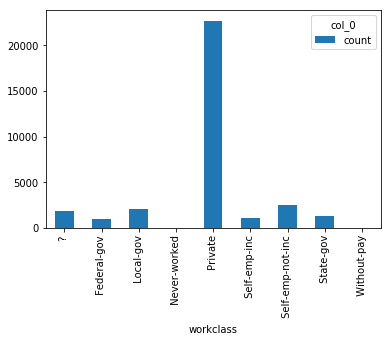

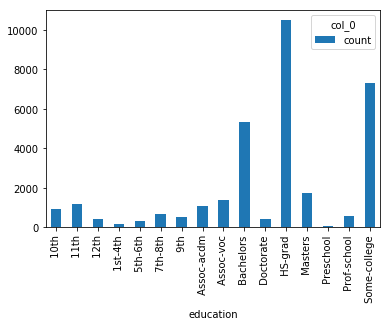

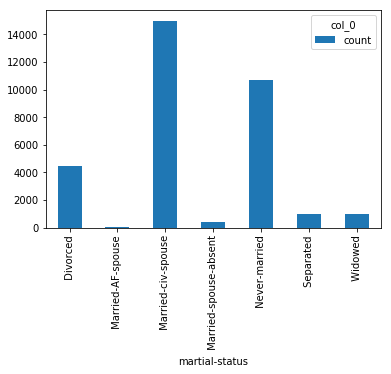

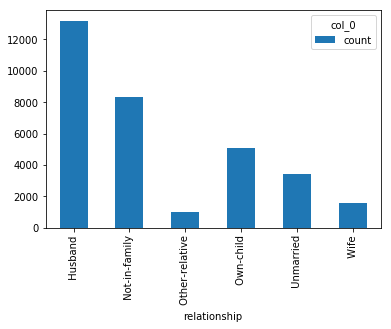

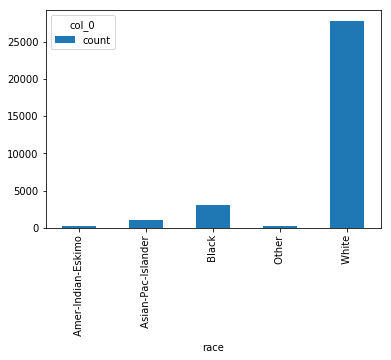

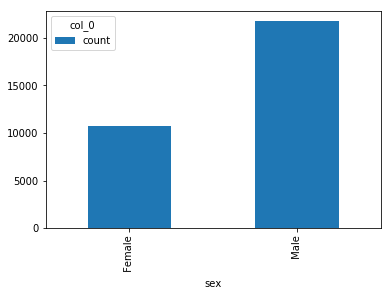

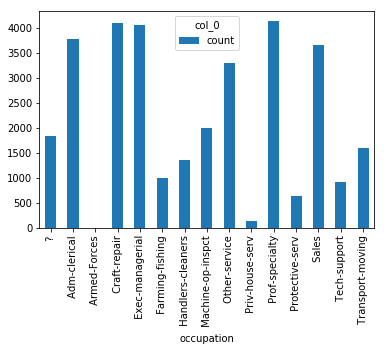

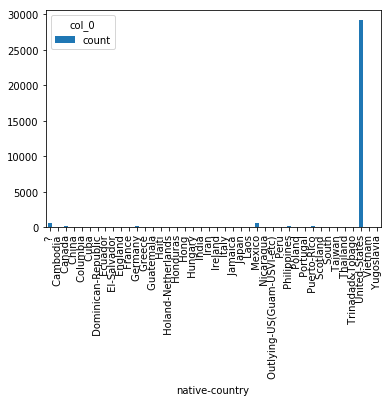

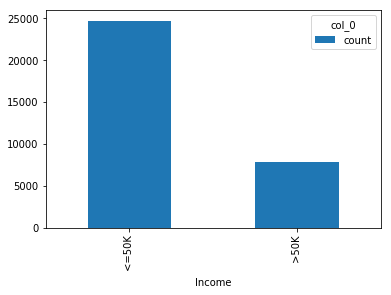

In [11]:
my_tab1 = pd.crosstab(index = adult["age"],columns="count")
my_tab1 = pd.crosstab(index = adult["workclass"],columns="count")
my_tab2 = pd.crosstab(index = adult["education"],columns="count")
my_tab3 = pd.crosstab(index = adult["martial-status"],columns="count")
my_tab4 = pd.crosstab(index = adult["relationship"],columns="count")
my_tab5 = pd.crosstab(index = adult["race"],columns="count")
my_tab6 = pd.crosstab(index = adult["sex"],columns="count")
my_tab7 = pd.crosstab(index = adult["occupation"],columns="count")
my_tab8 = pd.crosstab(index = adult["native-country"],columns="count")
my_tab9 = pd.crosstab(index = adult["Income"],columns="count")

my_tab1.plot.bar()
my_tab2.plot.bar()
my_tab3.plot.bar()
my_tab4.plot.bar()
my_tab5.plot.bar()
my_tab6.plot.bar()
my_tab7.plot.bar()
my_tab8.plot.bar()
my_tab9.plot.bar()

workclass를 살펴보면 압도적으로 private 즉 사기업에서 일하는 사람이 많다. education의 경우 위의 education-num에서 본 것 처럼 HS-grad이 가장 많고 그다음으로 bachelors와 some-college가 뒤를 잇는 것을 볼 수 있다. Martial Status같은 경우 경우 현재 결혼하고 있는 상태인 Married-CIV-spouse가 가장 높고 그 다음으로 미혼인 Never-married가 높다. 그 다음으론, 이혼 상태인 divorced가 3위이다. Relationship인 경우 본인이 husband라고 답한 사람이 가장 많고, 그 다음이 현재 가정이 없는 not-in-family이다. Race, 인종을 보면 백인이 가장 많고 그 다음이 흑인이다. 그리고 성별, sex같은 경우 남자라고 답한 사람이 여자보다 더 많다. 직업의 분포를 보면 사무직, 관리직, 전문직, 그리고 기능직이 가장 많다. 출신 나라같은 경우 미국이 대부분이다. 마지막으로 임금, Income의 경우 50K를 넘는 사람이 더 많다. 
즉 이 census에 있는 대부분의 사람은 아마도 사기업에서 일하고 고졸이며 결혼하였으며 남편,백인, 남자, 그리고 사무직,전문직,관리직 혹은 기능직이며 대부분 미국인이고 50K아래로 받을 가능성이 높다. 하지만 이는 가장 분포가 많은 것만으로 기준을 나눈 것이고 좀 더 detail하게 어떤 사람이 50K이상을 받는 지 혹은 적게 받는 지는 알 수 없다.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016621DE7438>,
      dtype=object)

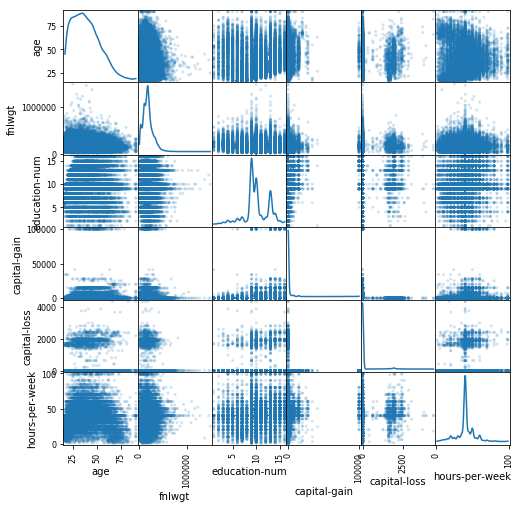

In [12]:
from pandas.plotting import scatter_matrix
scatter_matrix(adult, alpha=0.2, figsize=(8, 8), diagonal='kde')

위는 numerical한 data들을 각각 비교한 scatter graph이다. 여기서 재밌는 점은 나이와 hours-per-week 사이의 그래프이다. 나이가 어릴땐 일하는 시간이 적다가 30대부터 50대까지가 되면 제일 많아진다. 그리고 다시 줄어든다. 임금은 일하는 시간이 길수록 아무래도 더 많이 받을 것이므로 30대부터 50대일때가 가장 50K를 받을 확률이 클 것이다. 또한 capital-gain도 50대일때가 가장 많다고 나온다. 그래서 50대일수록 가장 50K를 받을 확률이 커진다. 

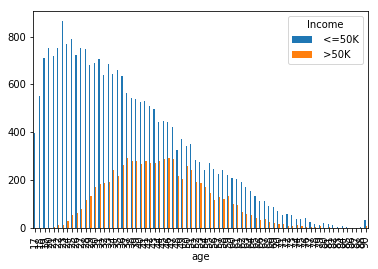

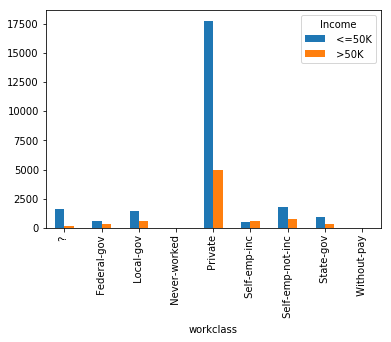

In [ ]:
column_list = adult.columns
column_list
for i in range(adult.columns.size - 1) :
    my_tabs = pd.crosstab(index = adult[column_list[i]], columns= adult["Income"])
    my_tabs.plot.bar()

위는 각 attribute을 index로 그리고 Income을 column으로 설정하여 관계를 보여주는 그래프이다. Age를 보면 확실히 50대정도가 되면 50K를 받는 사람이 가장 많은 것으로 나타난다.

이제 데이터에 대한 분석은 그만하고 Missing value등을 제거하는 preprocessing을 해보자. 

먼저 자세하게 attribute를 모르겠는 fnlwgt을 없앤다.

In [241]:
adult = adult.drop(columns = ['fnlwgt'])

KeyError: "['fnlwgt'] not found in axis"

이제 missing value를 없애도록 하겠다. 아래 코드를 보면 이 데이터에는 missing value를 null이라고 저장하지 않은 것을 알 수 있다. 그 대신에  이 데이터에서는 missing value를  "?" 로 표시하였다.

In [242]:
adult.isnull().sum()

age               0
workclass         0
education         0
education-num     0
martial-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Income            0
dtype: int64

In [243]:
import numpy as np

adult.replace(" ?",np.nan).isnull().sum()

age               0
workclass         0
education         0
education-num     0
martial-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Income            0
dtype: int64

In [244]:
adult.shape

(30162, 14)

위는 missing value가 " ?"로 되어있는 value들을 numpy의 nan으로 바꾸고 난 다음 mssing value의 개수를 살펴본 코드이다. 보면 workclass에서 1836개, occupation에서 1843개, native-county에서 583개가 있다. 그러면 missing value가 최대 4262개, 최소 1843개가 있다. adult는 총 32561개의 instance를 가지고 있으므로 4262개는 약 13%정도 이다. 그래서 지워도 큰 문제가 없을 꺼 같으므로 지우도록 하자.

In [245]:
adult.replace(" ?",np.nan).dropna().shape

(30162, 14)

In [246]:
adult = adult.replace(" ?", np.nan).dropna()
adult

age          workclass      education  education-num  \
0       39          State-gov      Bachelors             13   
1       50   Self-emp-not-inc      Bachelors             13   
2       38            Private        HS-grad              9   
3       53            Private           11th              7   
4       28            Private      Bachelors             13   
5       37            Private        Masters             14   
6       49            Private            9th              5   
7       52   Self-emp-not-inc        HS-grad              9   
8       31            Private        Masters             14   
9       42            Private      Bachelors             13   
10      37            Private   Some-college             10   
11      30          State-gov      Bachelors             13   
12      23            Private      Bachelors             13   
13      32            Private     Assoc-acdm             12   
15      34            Private        7th-8th              4   
16      25   Self-emp-not-inc        HS-grad              9   
17      32            Private        HS-grad              9   
18      38            Private           11th              7   
19      43   Self-emp-not-inc        Masters             14   
20      40            Private      Doctorate             16   
21      54            Private        HS-grad              9   
22      35        Federal-gov            9th              5   
23      43            Private           11th              7   
24      59            Private        HS-grad              9   
25      56          Local-gov      Bachelors             13   
26      19            Private        HS-grad              9   
28      39            Private        HS-grad              9   
29      49            Private        HS-grad              9   
30      23          Local-gov     Assoc-acdm             12   
31      20            Private   Some-college             10   
...    ...                ...            ...            ...   
32526   32            Private           10th              6   
32527   22            Private   Some-college             10   
32528   31            Private        HS-grad              9   
32529   29            Private        HS-grad              9   
32532   34            Private      Doctorate             16   
32533   54            Private      Bachelors             13   
32534   37            Private   Some-college             10   
32535   22            Private           12th              8   
32536   34            Private      Bachelors             13   
32537   30            Private        HS-grad              9   
32538   38            Private      Bachelors             13   
32540   45          State-gov        HS-grad              9   
32543   45          Local-gov     Assoc-acdm             12   
32544   31            Private        Masters             14   
32545   39          Local-gov     Assoc-acdm             12   
32546   37            Private     Assoc-acdm             12   
32547   43            Private        HS-grad              9   
32548   65   Self-emp-not-inc    Prof-school             15   
32549   43          State-gov   Some-college             10   
32550   43   Self-emp-not-inc   Some-college             10   
32551   32            Private           10th              6   
32552   43            Private      Assoc-voc             11   
32553   32            Private        Masters             14   
32554   53            Private        Masters             14   
32555   22            Private   Some-college             10   
32556   27            Private     Assoc-acdm             12   
32557   40            Private        HS-grad              9   
32558   58            Private        HS-grad              9   
32559   22            Private        HS-grad              9   
32560   52       Self-emp-inc        HS-grad              9   

               martial-status          occupation     relationship  \
0               Never-married 

na를 지우고 나면 instance수가 30162정도로 줄어드는데 이정도면 92%정도이므로 크게 차이가 나지 않아 지웠다. 

그런 다음, 이제 data set을 evaulte하기 위해 train set, validation set 그리고 test-set으로 나누어보자. training set은 prediction algorithm을 만들기 위해서 사용되는 데이터이다. validation set은 training set으로 만들어진 prediction algorithms의 성능을 비교할 때 사용된다. 마지막으로 test set은 가장 성능이 좋은 model을 정한 다음 그 전에 사용되지 않은 data들을 가지고 최종적으로 모델의 성능을 살펴볼 때 사용되는 set이다. training set : validation set : test set 은 60 : 20 : 20 비율로 나누어 보자.

In [247]:
from sklearn.model_selection import train_test_split

x = adult.drop('Income', axis= 1)
y = adult.Income

x_train, x_testValiSum, y_train, y_testValiSum = train_test_split(x, y,test_size=0.4)
x_valid, x_test, y_valid, y_test = train_test_split(x_testValiSum, y_testValiSum, test_size=0.5)

print(x_train.shape, y_train.shape, x_valid.shape, y_valid.shape, x_test.shape, y_test.shape)

(18097, 13) (18097,) (6032, 13) (6032,) (6033, 13) (6033,)


위는 train_test_split을 사용해서 data를 train, valid, test로 나누었다. valid와 test로 나눌 때, 나우어지는 숫자가 홀수여서 stratify는 사용하지 못하였다. 

이제 이 train, valid, test set을 가지고 model들을 학습시켜보도록 하자. 학습시킬 모델들은 아래와 같다.

- Decision tree
data들이 주어지면 entrophy를 사용하여 여러 rule들을 만드는 알고리즘이다. classification에서 가장 simple하면서도 좋은 성능을 내기 때문에 decision tree를 선택하였다.
- Naiive Bayes
Bayes' theorm을 바탕으로 분류를 하는 알고리즘이다. 작은 trained data만을 가지고도 빠르고 좋은 성능을 내기 때문에 선택하였다. 
- Random Forest
여러 decision tree를 겹쳐서 average한 다음 분류하는 알고리즘이다. 하나의 decision tree와 accuracy가 어떻게 차이가 나는 지 알아보겠다. 
- SVM (Support Vector Machine) Classifier
training data를 일종의 점으로 생각하여 분류하는 알고리즘이다. 고차원 space에 사용되면 효율적이고 메모리 효율이 좋다. 대신, probability estimates를 사용하는 대신에 오래걸리는 five-fold cross validation을 사용한다. 
- Nearest Neighbors Classifier
가장 가까운 포인트들의 class를 가지고 투표를 하여 class를 분류하는 알고리즘이다. 큰 규모의 data를 처리 할 때 빠르다. 
- Logistic Regression
logistic function을 사용해서 class들을 분류한다. 여러 독립적인 variables들이 있을 때 효과적이다. 
- MLP (Multi-layer Perceptron) Neural network
Perceptron을 여러 번 겹쳐서 분류하는 알고리즘이다. MLP의 일종인 Logistic Regression과 비교해서 알아보도록 하겠다. 
- Deep Learning
deep neural network를 사용하는 알고리즘이다. 


이 모델들을 가지고 학습시킨 다음에 training data와 valid data를 비교하면서 overfitting이 되었는 지 알아보겠다. 그런 다음, 개선 할 수 있는 부분이 있다면 개선 해보고 모든 모델들을 최종 평가하도록 하겠다.그리고 마지막으로 최고의 성능을 보여준 model을 선정하고 test-set으로 평가한 다음에 overfitting의 관점에서 살펴보도록 하겠다.


이제 데이터를 가지고 모델들을 학습시켜 보자

#### Decision Tree

In [248]:
from sklearn.tree import DecisionTreeClassifier

dtcf = DecisionTreeClassifier().fit(x_train, y_train)

ValueError: could not convert string to float: ' Private'

위와 같은 error가 생겼다. 이는 data중에 categorical한 데이터가 있는데 이를 컴퓨터가 이해할 수 있는 숫자로 바꾸어 줘야 한다. 그래서 아래와 같이 LabelEncoder를 사용해서 바꿔보자.

In [340]:
from sklearn.preprocessing import LabelEncoder

for column in x_train.columns:
    if x_train[column].dtype == type(object):
        le = LabelEncoder()
        x_train[column] = le.fit_transform(x_train[column])

le = LabelEncoder()
y_train = le.fit_transform(y_train)

for column in x_valid.columns:
    if x_valid[column].dtype == type(object):
        le = LabelEncoder()
        x_valid[column] = le.fit_transform(x_valid[column])

le = LabelEncoder()
y_valid = le.fit_transform(y_valid)

for column in x_test.columns:
    if x_test[column].dtype == type(object):
        le = LabelEncoder()
        x_test[column] = le.fit_transform(x_test[column])

le = LabelEncoder()
y_test = le.fit_transform(y_test)


C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [287]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix


accuracy_training_set = []
accuracy_test_set = []
f1_score_set = []
recall_score_set = []

dtcmodel = DecisionTreeClassifier().fit(x_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'. format(dtcmodel.score(x_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'. format(dtcmodel.score(x_valid, y_valid)))

accuracy_training_set.append(dtcmodel.score(x_train, y_train))
accuracy_test_set.append(dtcmodel.score(x_valid, y_valid))

y_pred = dtcmodel.fit(x_train, y_train).predict(x_valid)
cnf_matrix = confusion_matrix(y_valid, y_pred)

print("\ncnf_matrix")
print(cnf_matrix)

print("f1 score : ", f1_score(y_valid, y_pred, average="macro"))
print("recall : ", recall_score(y_valid, y_pred, average="macro")) 

f1_score_set.append(f1_score(y_valid, y_pred, average="macro"))
recall_score_set.append(recall_score(y_valid, y_pred, average="macro"))

Accuracy of Decision Tree classifier on training set: 0.98
Accuracy of Decision Tree classifier on test set: 0.80

cnf_matrix
[[3980  581]
 [ 594  877]]
f1 score :  0.7351065155776662
recall :  0.7344043602016386


위의 decision tree model을 만들고 train해본 결과 test set에서 0.80가 나왔다. 0.80면 생각보다 나쁘지 않은 결과이다. overfitting의 관점에서 training set으로 하였을 때는 0.98이 나왔는 데 새로운 data로 학습 시켰을 때는 0.80으로 떨어진 것을 알 수 있다. 이것은, 이 모델이 overfit되었을 가능성이 높다. 

cnf_matrix를 보면 TP는 3979, FN은 582, FP는 596, TN은 875로 TP가 가장 많다. 이는, 맞게 분류한 것이 대부분이라는 뜻인데 FN과 FP도 TN과 비슷한 것을 보면 model이 정확한 것은 아니다. 특히, F1은 0.73으로 accuracy보다 더 낮고 recall도 0.73이다. 

#### Naiive Bayesian

In [288]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train, y_train)

print('Accuracy of Naiive Bayesian classifier on training set: {:.2f}'. format(nb.score(x_train, y_train)))
print('Accuracy of Naiive Bayesian classifier on test set: {:.2f}'. format(nb.score(x_valid, y_valid)))

accuracy_training_set.append(nb.score(x_train, y_train))
accuracy_test_set.append(nb.score(x_valid, y_valid))

y_pred = nb.fit(x_train, y_train).predict(x_valid)
cnf_matrix = confusion_matrix(y_valid, y_pred)

print("\ncnf_matrix")
print(cnf_matrix)

print("f1 score : ", f1_score(y_valid, y_pred, average="macro"))
print("recall : ", recall_score(y_valid, y_pred, average="macro")) 

f1_score_set.append(f1_score(y_valid, y_pred, average="macro"))
recall_score_set.append(recall_score(y_valid, y_pred, average="macro"))

Accuracy of Naiive Bayesian classifier on training set: 0.79
Accuracy of Naiive Bayesian classifier on test set: 0.80

cnf_matrix
[[4333  228]
 [1001  470]]
f1 score :  0.6545876470109968
recall :  0.634760749778924


위의 Naiive Bayesian model은 training set으로 하였을 때 0.79 그리고 test set으로 하였을 땐 0.80이 나왔다. 둘의 accuracy가 거의 비슷한 것을 보면 overfit이 되지 않았을 가능성이 높다. 

confusion matrix를 보면 TP가 4333으로 가장 높은데, 특이한 점은 FP가 많다는 점이다. 그리고 f1 score는 0.65고 recall은 0.63으로 accuracy의 0.8보다 훨씬 낮은 것을 볼 수 있다. 

#### Random Forest

In [289]:
from sklearn.ensemble import RandomForestClassifier

rfm = RandomForestClassifier()
history.append(rfm.fit(x_train, y_train))

print('Accuracy of Random Forest classifier on training set: {:.2f}'. format(rfm.score(x_train, y_train)))
print('Accuracy of Random Forest classifier on test set: {:.2f}'. format(rfm.score(x_valid, y_valid)))

accuracy_training_set.append(rfm.score(x_train, y_train))
accuracy_test_set.append(rfm.score(x_valid, y_valid))

y_pred = rfm.fit(x_train, y_train).predict(x_valid)
cnf_matrix = confusion_matrix(y_valid, y_pred)

print("\ncnf_matrix")
print(cnf_matrix)

print("f1 score : ", f1_score(y_valid, y_pred, average="macro"))
print("recall : ", recall_score(y_valid, y_pred, average="macro")) 

f1_score_set.append(f1_score(y_valid, y_pred, average="macro"))
recall_score_set.append(recall_score(y_valid, y_pred, average="macro"))

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy of Random Forest classifier on training set: 0.97
Accuracy of Random Forest classifier on test set: 0.84

cnf_matrix
[[4164  397]
 [ 584  887]]
f1 score :  0.7692691283477788
recall :  0.7579744235963853


위의 Random Forest는 training set으로 하였을 때 0.97 그리고 test set으로 하였을 땐 0.84가 나왔다. test set의 accuracy는 높은 편이긴 하지만, training set이 0.97인것을 보아 overfit이 되었을 가능성이 아주 높다.

confusion matrix에서 TP는 가장 크고 다른 숫자도 고르게 나왔다. F1 score는 0.766으로 accuracy와 거의 비슷하고 recall도 비슷해서 precision이 높다고 할 수 있다. 

#### SVM

In [290]:
from sklearn.svm import SVC

svm = SVC(gamma = 'auto')
history.append(svm.fit(x_train, y_train))

print('Accuracy of SVM classifier on training set: {:.2f}'. format(svm.score(x_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'. format(svm.score(x_valid, y_valid)))

accuracy_training_set.append(svm.score(x_train, y_train))
accuracy_test_set.append(svm.score(x_valid, y_valid))

y_pred = svm.fit(x_train, y_train).predict(x_valid)
cnf_matrix = confusion_matrix(y_valid, y_pred)

print("\ncnf_matrix")
print(cnf_matrix)

print("f1 score : ", f1_score(y_valid, y_pred, average="macro"))
print("recall : ", recall_score(y_valid, y_pred, average="macro")) 

f1_score_set.append(f1_score(y_valid, y_pred, average="macro"))
recall_score_set.append(recall_score(y_valid, y_pred, average="macro"))

Accuracy of SVM classifier on training set: 0.92
Accuracy of SVM classifier on test set: 0.81

cnf_matrix
[[4331  230]
 [ 937  534]]
f1 score :  0.6795610305348985
recall :  0.6562954085199928


SVM의 경우 training set으론 0.92, test set은 0.80으로 test set의 accuracy는 높은 편이긴 하지만 overfit이 되었을 가능성이 높다. 

confusion matrix를 보면 f1 score는 0.67f로 accuracy인 0.81보다 훨씬 낮다. recall도 0.65로 비슷하다.

#### K-Nearest Neighbours

In [291]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
history.append(knn.fit(x_train, y_train))

print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(x_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
      .format(knn.score(x_valid, y_valid)))

accuracy_training_set.append(knn.score(x_train, y_train))
accuracy_test_set.append(knn.score(x_valid, y_valid))

y_pred = knn.fit(x_train, y_train).predict(x_valid)
cnf_matrix = confusion_matrix(y_valid, y_pred)

print("\ncnf_matrix")
print(cnf_matrix)

print("f1 score : ", f1_score(y_valid, y_pred, average="macro"))
print("recall : ", recall_score(y_valid, y_pred, average="macro")) 

f1_score_set.append(f1_score(y_valid, y_pred, average="macro"))
recall_score_set.append(recall_score(y_valid, y_pred, average="macro"))

Accuracy of K-NN classifier on training set: 0.88
Accuracy of K-NN classifier on test set: 0.84

cnf_matrix
[[4132  429]
 [ 543  928]]
f1 score :  0.775526918527403
recall :  0.7684025188579735


training set은 0.88이고 test set은 0.83이다. training set이 더 큰걸로 보아 overfit이 되었을 가능성이 높다. 

f1 score는 0.77로 accuracy와 어느정도 비슷하고 recall도 비슷하다.

#### Logistic Regression

In [292]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
history.append(logreg.fit(x_train, y_train))

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(x_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(x_valid, y_valid)))

accuracy_training_set.append(logreg.score(x_train, y_train))
accuracy_test_set.append(logreg.score(x_valid, y_valid))

y_pred = logreg.fit(x_train, y_train).predict(x_valid)
cnf_matrix = confusion_matrix(y_valid, y_pred)

print("\ncnf_matrix")
print(cnf_matrix)

print("f1 score : ", f1_score(y_valid, y_pred, average="macro"))
print("recall : ", recall_score(y_valid, y_pred, average="macro")) 

f1_score_set.append(f1_score(y_valid, y_pred, average="macro"))
recall_score_set.append(recall_score(y_valid, y_pred, average="macro"))

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy of Logistic regression classifier on training set: 0.81
Accuracy of Logistic regression classifier on test set: 0.81


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



cnf_matrix
[[4305  256]
 [ 896  575]]
f1 score :  0.690778495170283
recall :  0.6673812542748938


위의 logistic Regression은 trainging set과 test set의 결과가 똑같다. 이는 overfit이 되지 않았을 가능성이 높다.

f1 score는 0.7, recall은 0.66로 accuracy에 비해 훨씬 낮다.

#### MLP Classifier

In [293]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier()
history.append(mlp.fit(x_train, y_train))

print('Accuracy of MLP classifier on training set: {:.2f}'.format(mlp.score(x_train, y_train)))
print('Accuracy of MLP classifier on test set: {:.2f}'.format(mlp.score(x_valid, y_valid)))

accuracy_training_set.append(mlp.score(x_train, y_train))
accuracy_test_set.append(mlp.score(x_valid, y_valid))

y_pred = mlp.fit(x_train, y_train).predict(x_valid)
cnf_matrix = confusion_matrix(y_valid, y_pred)

print("\ncnf_matrix")
print(cnf_matrix)

print("f1 score : ", f1_score(y_valid, y_pred, average="macro"))
print("recall : ", recall_score(y_valid, y_pred, average="macro")) 

f1_score_set.append(f1_score(y_valid, y_pred, average="macro"))
recall_score_set.append(recall_score(y_valid, y_pred, average="macro"))

Accuracy of MLP classifier on training set: 0.82
Accuracy of MLP classifier on test set: 0.82

cnf_matrix
[[3654  907]
 [ 379 1092]]
f1 score :  0.7398777647296317
recall :  0.7717461211277417


training set의 accuracy는 0.88이고 test set의 accuracy는 0.83이다. 이는 overfit이 되었을 가능성이 높다.

f1 score와 recall은 둘다 0.7로 accuracy인 0.82보다 낮다.

In [142]:
import keras

In [143]:
from keras.models import Sequential

In [323]:
nm_model = Sequential()

In [145]:
from keras.layers import InputLayer, Dense

In [146]:
nm_model.add(InputLayer(input_shape=(13, )))

In [147]:
nm_model.add(Dense(units = 13, activation = 'sigmoid'))

In [148]:
nm_model.add(Dense(units = 6, activation = 'sigmoid'))

In [149]:
nm_model.add(Dense(units = 3, activation = 'sigmoid'))

In [150]:
nm_model.add(Dense(units = 1, activation = 'sigmoid'))

In [151]:
nm_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 13)                182       
_________________________________________________________________
dense_38 (Dense)             (None, 6)                 84        
_________________________________________________________________
dense_39 (Dense)             (None, 3)                 21        
_________________________________________________________________
dense_40 (Dense)             (None, 1)                 4         
Total params: 291
Trainable params: 291
Non-trainable params: 0
_________________________________________________________________


In [152]:
nm_model.compile(optimizer = 'sgd',loss = 'mean_squared_error', metrics = ['accuracy'])

In [153]:
nm_model.fit(x = x_train, y = y_train, epochs = 1000, validation_data = (x_valid, y_valid))


Train on 18097 samples, validate on 6032 samples
Epoch 1/1000
18097/18097 [==============================] - 1s 43us/step - loss: 0.1878 - acc: 0.7522 - val_loss: 0.1886 - val_acc: 0.7487
Epoch 2/1000
18097/18097 [==============================] - 1s 37us/step - loss: 0.1866 - acc: 0.7522 - val_loss: 0.1882 - val_acc: 0.7487
Epoch 3/1000
18097/18097 [==============================] - 1s 34us/step - loss: 0.1864 - acc: 0.7522 - val_loss: 0.1881 - val_acc: 0.7487
Epoch 4/1000
18097/18097 [==============================] - 1s 38us/step - loss: 0.1863 - acc: 0.7522 - val_loss: 0.1880 - val_acc: 0.7487
Epoch 5/1000
18097/18097 [==============================] - 1s 34us/step - loss: 0.1861 - acc: 0.7522 - val_loss: 0.1879 - val_acc: 0.7487
Epoch 6/1000
18097/18097 [==============================] - 1s 33us/step - loss: 0.1860 - acc: 0.7522 - val_loss: 0.1878 - val_acc: 0.7487
Epoch 7/1000
18097/18097 [==============================] - 1s 36us/step - loss: 0.1859 - acc: 0.7522 - val_loss: 0.1

위를 보면 accuracy는 0.8049, validation accuracy는 0.8014로 거의 차이가 없다. 즉, overfit이 없다고 할 수 있다.

deep learning의 confusion matrix는 찾을 수 없었다.

In [294]:
accuracy_training_set.append(0.8048)
accuracy_test_set.append(0.8011)

#### Evaluation metrics

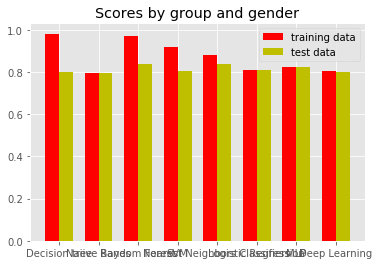

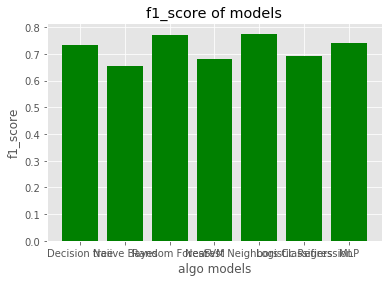

([<matplotlib.axis.XTick at 0x16641b5c390>,
 <a list of 7 Text xticklabel objects>)

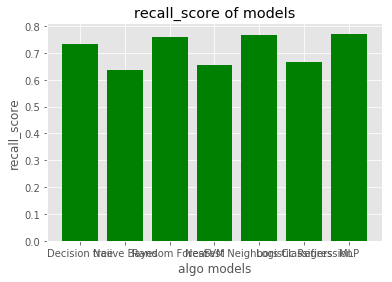

In [298]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

N = 8
fig, ax = plt.subplots()

ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, accuracy_training_set, width, color='r', bottom=0)

p2 = ax.bar(ind + width, accuracy_test_set, width, color='y', bottom=0)

ax.set_title('Scores by group and gender')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('Decision tree', 'Naiive Bayes', 'Random Forest', 'SVM', 'Nearest Neighbors Classifiers',
                   'Logistic Regression', 'MLP', 'Deep Learning'))

ax.legend((p1[0], p2[0]), ('training data', 'test data'))
ax.autoscale_view()

plt.show()

x = ['Decision tree', 'Naiive Bayes', 'Random Forest', 'SVM', 'Nearest Neighbors Classifiers',
                   'Logistic Regression', 'MLP']

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, f1_score_set , color='green')
plt.xlabel("algo models")
plt.ylabel("f1_score")
plt.title("f1_score of models")

plt.xticks(x_pos, x)

plt.show()

plt.bar(x_pos, recall_score_set, color='green')
plt.xlabel("algo models")
plt.ylabel("recall_score")
plt.title("recall_score of models")

plt.xticks(x_pos, x)


위는 training data와 test data를 비교한 그래프이다. 보면, training data와 test data의 차이가 많이 나는 것이 overfit이 될 가능성이 높은 것인데, decision tree, Random Forest, SVM등이 높았다. overfit 가능성이 가장 낮으면서 test data accuracy가 가장 높은 것은 MLP이다. 그리고 f1_score과 recall을 보면 random forest, nearnest algo, MLP정도가 높다. 즉, 전체적으로 가장 좋은 성능을 보이는 것은 MLP이다. 

#### modification

좀 더 accuracy를 높이기 위해 option들을 줘보도록 하겠다.

- Decision tree : overfit에 문제가 있었으므로 overfit을 줄이기 위해 pruning을 한다.

- Naiive Bayes Bayes : 알고리즘 자체가 높은 accuracy를 주는 알고리즘이 아니고 또 overfit이 되지 않았으므로 그냥 놔둔다. 

- Random Forest : max-depth를 5로 제한해 overfit을 줄인다.

- SVM (Support Vector Machine) : max-depth를 5로 제한해 overfit을 줄인다.

- Nearest Neighbors Classifier : neighbor의 숫자를 10으로 늘렸다.

- Logistic Regression : solver= 'newton-cg'로 바꾸었다. 

- MLP (Multi-layer Perceptron) : logistic으로 바꾸어 보았다.

- Deep Learning : drop out을 0.2로 setting 하였다. 

### Decision Tree

In [328]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix


accuracy_training_set = []
accuracy_test_set = []
f1_score_set = []
recall_score_set = []

dtcmodel = DecisionTreeClassifier(max_depth= 5).fit(x_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'. format(dtcmodel.score(x_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'. format(dtcmodel.score(x_valid, y_valid)))

accuracy_training_set.append(dtcmodel.score(x_train, y_train))
accuracy_test_set.append(dtcmodel.score(x_valid, y_valid))

y_pred = dtcmodel.fit(x_train, y_train).predict(x_valid)
cnf_matrix = confusion_matrix(y_valid, y_pred)

print("\ncnf_matrix")
print(cnf_matrix)

print("f1 score : ", f1_score(y_valid, y_pred, average="macro"))
print("recall : ", recall_score(y_valid, y_pred, average="macro")) 

f1_score_set.append(f1_score(y_valid, y_pred, average="macro"))
recall_score_set.append(recall_score(y_valid, y_pred, average="macro"))

Accuracy of Decision Tree classifier on training set: 0.85
Accuracy of Decision Tree classifier on test set: 0.84

cnf_matrix
[[4332  229]
 [ 749  722]]
f1 score :  0.7473851240213003
recall :  0.7203071410121369


pruning을 넣은 결과 accuracy가 0.84로 높아졌고 overfit을 피하게 되었다. 또한 f1 score와 recall도 값이 높아졌다.

#### Naiive bayes 

In [329]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB(var_smoothing=1e-10)
nb.fit(x_train, y_train)

print('Accuracy of Naiive Bayesian classifier on training set: {:.2f}'. format(nb.score(x_train, y_train)))
print('Accuracy of Naiive Bayesian classifier on test set: {:.2f}'. format(nb.score(x_valid, y_valid)))

accuracy_training_set.append(nb.score(x_train, y_train))
accuracy_test_set.append(nb.score(x_valid, y_valid))

y_pred = nb.fit(x_train, y_train).predict(x_valid)
cnf_matrix = confusion_matrix(y_valid, y_pred)

print("\ncnf_matrix")
print(cnf_matrix)

print("f1 score : ", f1_score(y_valid, y_pred, average="macro"))
print("recall : ", recall_score(y_valid, y_pred, average="macro")) 

f1_score_set.append(f1_score(y_valid, y_pred, average="macro"))
recall_score_set.append(recall_score(y_valid, y_pred, average="macro"))

Accuracy of Naiive Bayesian classifier on training set: 0.79
Accuracy of Naiive Bayesian classifier on test set: 0.80

cnf_matrix
[[4334  227]
 [ 991  480]]
f1 score :  0.6587834091006621
recall :  0.6382694231276282


#### Random Forest

In [330]:
from sklearn.ensemble import RandomForestClassifier

rfm = RandomForestClassifier(max_depth=5)
history.append(rfm.fit(x_train, y_train))

print('Accuracy of Random Forest classifier on training set: {:.2f}'. format(rfm.score(x_train, y_train)))
print('Accuracy of Random Forest classifier on test set: {:.2f}'. format(rfm.score(x_valid, y_valid)))

accuracy_training_set.append(rfm.score(x_train, y_train))
accuracy_test_set.append(rfm.score(x_valid, y_valid))

y_pred = rfm.fit(x_train, y_train).predict(x_valid)
cnf_matrix = confusion_matrix(y_valid, y_pred)

print("\ncnf_matrix")
print(cnf_matrix)

print("f1 score : ", f1_score(y_valid, y_pred, average="macro"))
print("recall : ", recall_score(y_valid, y_pred, average="macro")) 

f1_score_set.append(f1_score(y_valid, y_pred, average="macro"))
recall_score_set.append(recall_score(y_valid, y_pred, average="macro"))

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy of Random Forest classifier on training set: 0.84
Accuracy of Random Forest classifier on test set: 0.84

cnf_matrix
[[4438  123]
 [ 828  643]]
f1 score :  0.7390514369763652
recall :  0.7050749184220964


max-depth를 5로 지정하니 accuracy가 0.84로 올라가고 overfit이 없어졌다.

### SVM

In [331]:
from sklearn.svm import SVC

svm = SVC(gamma= 'auto', max_iter= -1, decision_function_shape = 'ovo')
history.append(svm.fit(x_train, y_train))

print('Accuracy of SVM classifier on training set: {:.2f}'. format(svm.score(x_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'. format(svm.score(x_valid, y_valid)))

accuracy_training_set.append(svm.score(x_train, y_train))
accuracy_test_set.append(svm.score(x_valid, y_valid))

y_pred = svm.fit(x_train, y_train).predict(x_valid)
cnf_matrix = confusion_matrix(y_valid, y_pred)

print("\ncnf_matrix")
print(cnf_matrix)

print("f1 score : ", f1_score(y_valid, y_pred, average="macro"))
print("recall : ", recall_score(y_valid, y_pred, average="macro")) 

f1_score_set.append(f1_score(y_valid, y_pred, average="macro"))
recall_score_set.append(recall_score(y_valid, y_pred, average="macro"))

Accuracy of SVM classifier on training set: 0.92
Accuracy of SVM classifier on test set: 0.81

cnf_matrix
[[4331  230]
 [ 937  534]]
f1 score :  0.6795610305348985
recall :  0.6562954085199928


decision_function_tree를 'ovo'로 바꿨다. 그러니, accuracy는 더 높아졌지만 그만 큼 overfit도 심해졌다.

#### KNN

In [332]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 10)
history.append(knn.fit(x_train, y_train))

print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(x_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
      .format(knn.score(x_valid, y_valid)))

accuracy_training_set.append(knn.score(x_train, y_train))
accuracy_test_set.append(knn.score(x_valid, y_valid))

y_pred = knn.fit(x_train, y_train).predict(x_valid)
cnf_matrix = confusion_matrix(y_valid, y_pred)

print("\ncnf_matrix")
print(cnf_matrix)

print("f1 score : ", f1_score(y_valid, y_pred, average="macro"))
print("recall : ", recall_score(y_valid, y_pred, average="macro")) 

f1_score_set.append(f1_score(y_valid, y_pred, average="macro"))
recall_score_set.append(recall_score(y_valid, y_pred, average="macro"))

Accuracy of K-NN classifier on training set: 0.86
Accuracy of K-NN classifier on test set: 0.84

cnf_matrix
[[4258  303]
 [ 645  826]]
f1 score :  0.7676077768385461
recall :  0.7475449868993929


이번에는 n_neighbor를 10으로 바꾸고 해보니 accuracy가 늘고 overfit이 줄어들었다.

#### logisitics

In [333]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver= 'newton-cg')
history.append(logreg.fit(x_train, y_train))

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(x_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(x_valid, y_valid)))

accuracy_training_set.append(logreg.score(x_train, y_train))
accuracy_test_set.append(logreg.score(x_valid, y_valid))

y_pred = logreg.fit(x_train, y_train).predict(x_valid)
cnf_matrix = confusion_matrix(y_valid, y_pred)

print("\ncnf_matrix")
print(cnf_matrix)

print("f1 score : ", f1_score(y_valid, y_pred, average="macro"))
print("recall : ", recall_score(y_valid, y_pred, average="macro")) 

f1_score_set.append(f1_score(y_valid, y_pred, average="macro"))
recall_score_set.append(recall_score(y_valid, y_pred, average="macro"))

Accuracy of Logistic regression classifier on training set: 0.82
Accuracy of Logistic regression classifier on test set: 0.82

cnf_matrix
[[4285  276]
 [ 791  680]]
f1 score :  0.724821742050611
recall :  0.7008787594286141


solver를 'newton-cg'로 바꾸었으나 별로 큰 차이는 없다. 

#### MLP

In [334]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(activation='logistic')
mlp.fit(x_train, y_train)

print('Accuracy of MLP classifier on training set: {:.2f}'.format(mlp.score(x_train, y_train)))
print('Accuracy of MLP classifier on test set: {:.2f}'.format(mlp.score(x_valid, y_valid)))

accuracy_training_set.append(mlp.score(x_train, y_train))
accuracy_test_set.append(mlp.score(x_valid, y_valid))

y_pred = mlp.fit(x_train, y_train).predict(x_valid)
cnf_matrix = confusion_matrix(y_valid, y_pred)

print("\ncnf_matrix")
print(cnf_matrix)

print("f1 score : ", f1_score(y_valid, y_pred, average="macro"))
print("recall : ", recall_score(y_valid, y_pred, average="macro")) 

f1_score_set.append(f1_score(y_valid, y_pred, average="macro"))
recall_score_set.append(recall_score(y_valid, y_pred, average="macro"))

Accuracy of MLP classifier on training set: 0.84
Accuracy of MLP classifier on test set: 0.84

cnf_matrix
[[4239  322]
 [ 670  801]]
f1 score :  0.7564135902932525
recall :  0.7369644896710219


activation을 logistic으로 바꾸었고 accuracy가 0.83으로 올라갔다.

#### deep learning

In [322]:
from keras.layers import Dropout 

In [325]:
nn_model4 = Sequential()

nn_model4.add(InputLayer((13,)))

nn_model4.add(Dense(units=13, activation = 'sigmoid'))
nn_model4.add(Dropout(rate=0.2))
nn_model4.add(Dense(units=6, activation = 'sigmoid'))
nn_model4.add(Dropout(rate=0.2))
nn_model4.add(Dense(units=3, activation = 'sigmoid'))
nn_model4.add(Dropout(rate=0.2))
nn_model4.add(Dense(units=1, activation='sigmoid'))

nn_model4.compile(optimizer='sgd', loss = 'mean_squared_error', metrics = ['accuracy'])
nn_model4.fit(x = x_train, y = y_train, epochs= 1000, validation_data = (x_valid, y_valid))

Train on 18097 samples, validate on 6032 samples
Epoch 1/1000
18097/18097 [==============================] - 2s 97us/step - loss: 0.2074 - acc: 0.7156 - val_loss: 0.1889 - val_acc: 0.7561
Epoch 2/1000
18097/18097 [==============================] - 1s 42us/step - loss: 0.1943 - acc: 0.7470 - val_loss: 0.1850 - val_acc: 0.7561
Epoch 3/1000
18097/18097 [==============================] - 1s 40us/step - loss: 0.1921 - acc: 0.7488 - val_loss: 0.1842 - val_acc: 0.7561
Epoch 4/1000
18097/18097 [==============================] - 1s 39us/step - loss: 0.1916 - acc: 0.7488 - val_loss: 0.1840 - val_acc: 0.7561
Epoch 5/1000
18097/18097 [==============================] - 1s 43us/step - loss: 0.1917 - acc: 0.7488 - val_loss: 0.1839 - val_acc: 0.7561
Epoch 6/1000
18097/18097 [==============================] - 1s 40us/step - loss: 0.1918 - acc: 0.7488 - val_loss: 0.1838 - val_acc: 0.7561
Epoch 7/1000
18097/18097 [==============================] - 1s 39us/step - loss: 0.1902 - acc: 0.7488 - val_loss: 0.1

In [335]:
accuracy_training_set.append(0.7805)
accuracy_test_set.append(0.8004)

위의 것을 진행 했을 때 반대로 test_set은 줄어들었지만 overfit은 줄어들 지 않았다. 

#### Evaluation metrics

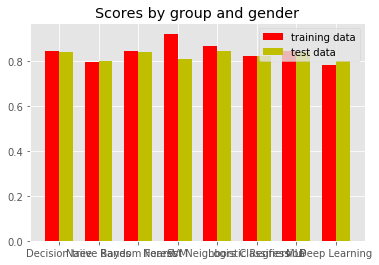

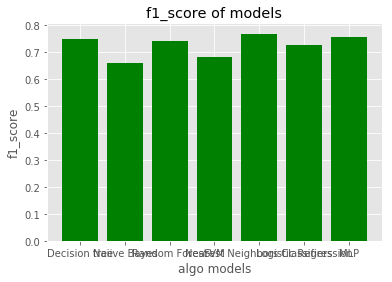

([<matplotlib.axis.XTick at 0x1663d5b4208>,
 <a list of 7 Text xticklabel objects>)

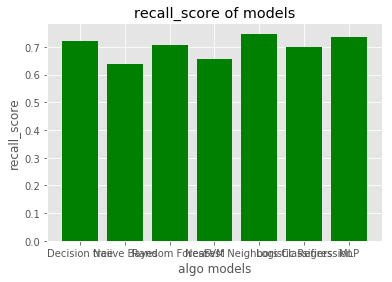

In [337]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

N = 8
fig, ax = plt.subplots()

ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, accuracy_training_set, width, color='r', bottom=0)

p2 = ax.bar(ind + width, accuracy_test_set, width, color='y', bottom=0)

ax.set_title('Scores by group and gender')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('Decision tree', 'Naiive Bayes', 'Random Forest', 'SVM', 'Nearest Neighbors Classifiers',
                   'Logistic Regression', 'MLP', 'Deep Learning'))

ax.legend((p1[0], p2[0]), ('training data', 'test data'))
ax.autoscale_view()

plt.show()

x = ['Decision tree', 'Naiive Bayes', 'Random Forest', 'SVM', 'Nearest Neighbors Classifiers',
                   'Logistic Regression', 'MLP']

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, f1_score_set , color='green')
plt.xlabel("algo models")
plt.ylabel("f1_score")
plt.title("f1_score of models")

plt.xticks(x_pos, x)

plt.show()

plt.bar(x_pos, recall_score_set, color='green')
plt.xlabel("algo models")
plt.ylabel("recall_score")
plt.title("recall_score of models")

plt.xticks(x_pos, x)


대부분의 accuracy는 attriubute를 바꾸기 전보다 올라갔고 특히 overfit의 문제를 가지고 있던 model들은 대부분 overfit 문제가 사라졌다.

### Final model test

In [341]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(activation='logistic')
mlp.fit(x_train, y_train)

print('Accuracy of MLP classifier on training set: {:.2f}'.format(mlp.score(x_train, y_train)))
print('Accuracy of MLP classifier on test set: {:.2f}'.format(mlp.score(x_test, y_test)))

Accuracy of MLP classifier on training set: 0.85
Accuracy of MLP classifier on test set: 0.85


가장 accuracy와 f1_score와 recall이 가장 높은 MLP로 마지막 TEST SET을 진행해 보았다. test set의 accuracy는 0.85로 지금까지의 accuracy중 가장 높게 나왔다. 

### Conclusion

In [ ]:
연봉이 50K가 넘는 지 안 넘는지를 알아보는 classification data를 선택하여 진행해 보았다. 
data processing 과정에서 주로 나이가 많고 education이 긴 사람이 50K가 넘는 것을 확인 하였다. 그런 다음, 
categorical 한 data들을 nomial 하게 전처리를 해주었고 decision tree, naiive bayes, random forest, svm, 
nearnest neighbors classifier, logistic regression, MLP, Deep Learning을 사용하여 가장 분류를 잘하는 모델을 
찾아 보았다. 처음엔, 여러 모델들이 overfit이 되는 상황이 연출 되었으나 attribute를 바꾸고 pruning을 해주는 등
의 노력을 한 결과 많이 accuracy가 증가하고 overfit이 줄어드는 상황을 보았다.
마지막으로 MLP가 가장 결과과 좋았던 관계로 MLP를 test set을 통해 실험해 보았고 0.85로 가장 높게 나왔다.